<a href="https://colab.research.google.com/github/dev-nanthan/KNN_Classifier/blob/main/MLA1_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT Required Packages and Required Train and Test Data

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier

# Try to Load the data from repo url
path_train_sDat = "https://github.com/dev-nanthan/KNN_Classifier/blob/4204c19bb231a8652b7a4704f953aeff5467092c/train.sDAT.csv"
path_test_sDat = "https://github.com/dev-nanthan/KNN_Classifier/blob/4204c19bb231a8652b7a4704f953aeff5467092c/test.sDAT.csv"
path_train_sNC = "https://github.com/dev-nanthan/KNN_Classifier/blob/4204c19bb231a8652b7a4704f953aeff5467092c/train.sNC.csv"
path_test_sNC = "https://github.com/dev-nanthan/KNN_Classifier/blob/4204c19bb231a8652b7a4704f953aeff5467092c/test.sNC.csv"
path_plot = "https://github.com/dev-nanthan/KNN_Classifier/blob/4204c19bb231a8652b7a4704f953aeff5467092c/2D_grid_points.csv"

#train_sNC = pd.read_csv(path_train_sNC)
#train_sDAT = pd.read_csv(path_train_sDat)
#test_sNC = pd.read_csv(path_test_sNC)
#test_sDAT = pd.read_csv(path_test_sDat)

# use local session files for now

train_sNC = pd.read_csv("train.sNC.csv")
train_sDAT = pd.read_csv("train.sDAT.csv")
test_sNC = pd.read_csv("test.sNC.csv")
test_sDAT = pd.read_csv("test.sDAT.csv")



### **Format Train Data and Test Data: Concat sDAT next to sNC**

In [31]:

# Train Data is costructed as Pandas Dataframe objects (2D Datastructure) 
train_data = pd.concat([train_sNC, train_sDAT], ignore_index=True)
print("Train Data Size:", len(train_data))
#print(train_data)
train_labels = np.concatenate([np.zeros(len(train_sNC)), np.ones(len(train_sDAT))])
print("Train Label Size",len(train_labels))
#print(train_labels)

# Test Data is costructed as Pandas Dataframe objects (2D Datastructure) 
test_data = pd.concat([test_sNC, test_sDAT], ignore_index=True)
print("Test Data Size:", len(test_data))
#print(test_data)
test_labels = np.concatenate([np.zeros(len(test_sNC)), np.ones(len(test_sDAT))])
print("Test Label Size",len(test_labels))
#print(test_labels)

Train Data Size: 474
Train Label Size 474
Test Data Size: 200
Test Label Size 200


# Question 1

---


**For Given K options Fit the classifier using Euclidean Distance**  

Train kNN classifiers using the Euclidean distance metric and setting k = 1, 3, 5, 10, 20, 30, 50, 100, 150, 200 respectively. Generate classification boundary visualization plots similar to Figure 2 for each of the trained classifiers.
However, your plots should also contain an overlay of the training and test dataset samples colored based on their true
class labels. In the plot title, report the error rates achieved on the training and test datasets respectively. Discuss the
classification performance of the classifiers trained for various “k” values in the context of over(under)fitting, bias and
variance.

In [32]:
K_vals = [1,3,5,10,20,30,50,100,150,200]

# Stored Results produced by Each Models using Index of K_vals
results = []
# Stored Eacg models of diff K valuesusing Index of K_vals
KNN = []

for i, k in enumerate(K_vals):
  knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
  KNN.append(knn)
  KNN[i].fit(train_data, train_labels)
  train_accuracy = KNN[i].score(train_data, train_labels)
  test_accuracy = KNN[i].score(test_data, test_labels)

  train_error = 1 - train_accuracy
  test_error = 1 - test_accuracy
  print("k={}, Train accuracy={:.2f}, Test accuracy={:.2f}".format(k, train_accuracy, test_accuracy))
  d_temp = {"K":k, "train_accuracy":train_accuracy, "test_accuracy": test_accuracy,
            "train_error":train_error, "test_error":test_error}
  results.append(d_temp)

# Get the Best Performing K value based on Test_Accuracy
opt_i = 0;
temp_max = 0;
for i, r in enumerate(results):
  if (r["test_accuracy"]>temp_max):
    opt_i = i
    temp_max = r["test_accuracy"]
    #print (r)


print("Optimum Results:", results[opt_i])

OPT_R = results[opt_i]
OPT_K = results[opt_i]["K"]
OPT_Mod = KNN[opt_i]


print("Optimum K:", OPT_K)
print("Optimum Model:", OPT_Mod)


k=1, Train accuracy=1.00, Test accuracy=0.78
k=3, Train accuracy=0.86, Test accuracy=0.80
k=5, Train accuracy=0.84, Test accuracy=0.83
k=10, Train accuracy=0.85, Test accuracy=0.83
k=20, Train accuracy=0.83, Test accuracy=0.83
k=30, Train accuracy=0.83, Test accuracy=0.84
k=50, Train accuracy=0.84, Test accuracy=0.81
k=100, Train accuracy=0.80, Test accuracy=0.80
k=150, Train accuracy=0.81, Test accuracy=0.81
k=200, Train accuracy=0.78, Test accuracy=0.80
Optimum Results: {'K': 30, 'train_accuracy': 0.8312236286919831, 'test_accuracy': 0.84, 'train_error': 0.16877637130801693, 'test_error': 0.16000000000000003}
Optimum K: 30
Optimum Model: KNeighborsClassifier(metric='euclidean', n_neighbors=30)


### Plot the Grid Points and Classify the boundary based on simple given Rule
Sample Label Criteria: `y^ = 0` when `R1<R2`, `y^ = 1` when `R1>=R2`.

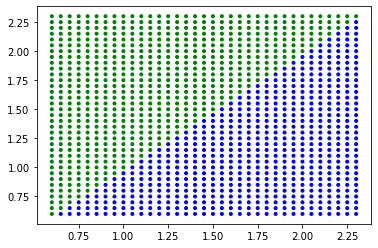

In [33]:
grid_df = pd.read_csv("2D_grid_points.csv")
#print(grid_df)

r1 = grid_df['R1']
r2 = grid_df['R2']

# Assign the class labels for the provided Grid points.
# Assign Criteria: y` = 0 when R1<R2, y` = 1 when R1>=R2.
g_y = (r1>r2).astype(int)

# Create scatter plot of grid points with assigned classes
fig, ax = plt.subplots()
colors = ListedColormap(['green', 'blue'])

ax.scatter(r1, r2, c=g_y, cmap=colors, marker='.')

# Draw Contour through the class boundary using meshgrid, Contour - Not Done yet
R1, R2 = np.meshgrid(r1, r2)
Y = (R1>R2).astype(int)
#ax.contour(R1, R2, Y, levels=[0.5], colors='black')

plt.show()


### Plot the Classification Boundary Visualization for the Optimum K 

Marker Rules:
*   Train Data Labels: o
*   Test Data Labels: +

Color Rules:

*   sNC (No Alzheimers) - green
*   sDAT (Alzheimers) - Blue

**Used Libs:**

* `sklearn.neighbors.KNeighborsClassifier.predict(X)`
* `pd.iloc[<row_sel>, <col_sel>])`
* `matplotlib.pyplot.scatter(x, y, c=None, marker=None, cmap=None, vmin=None, vmax=None, alpha=None, **kwargs)`







In [29]:
# Enable and Disabel warning as required
import warnings
warnings.filterwarnings("ignore")
#warnings.resetwarnings()

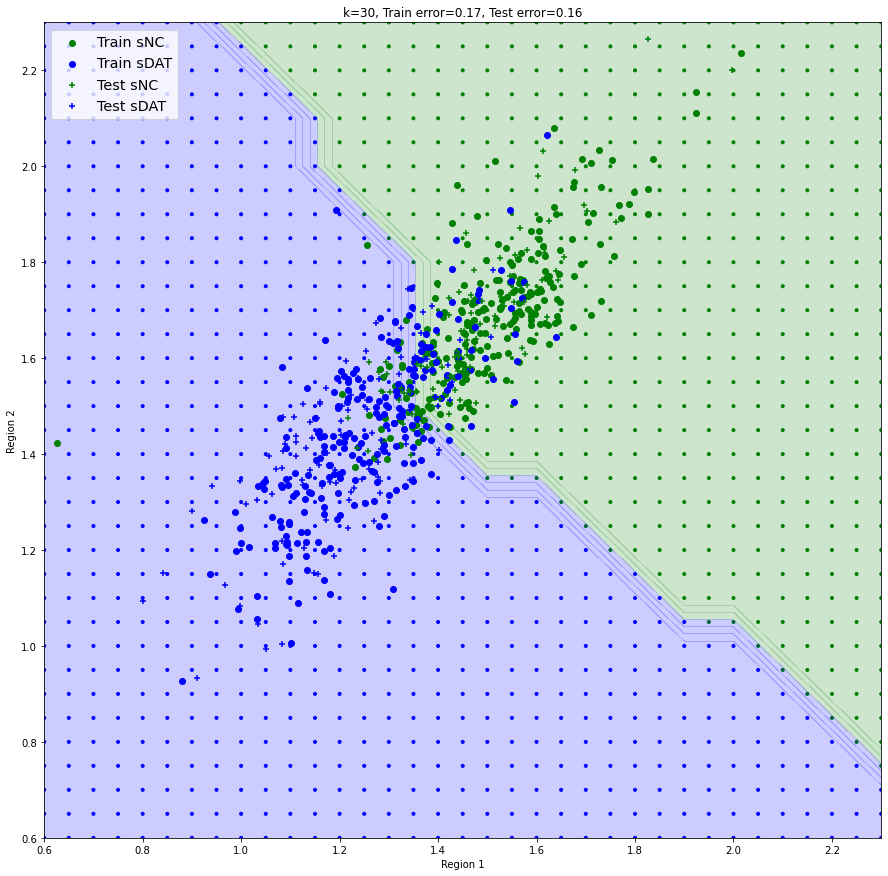

In [34]:

grid_df = pd.read_csv("2D_grid_points.csv")
colors = ListedColormap(['green', 'blue'])

# Predict and Plot the Labels for grid points using Optimum model
grid_predictions = OPT_Mod.predict(grid_df)

plt.figure(figsize=(15,15))
plt.scatter(grid_df.iloc[:, 0], grid_df.iloc[:, 1], c=grid_predictions, marker='.', cmap=colors)

# Draw Contour through class boundary
x_min, x_max = grid_df.iloc[:, 0].min(), grid_df.iloc[:, 0].max()+0.1
y_min, y_max = grid_df.iloc[:, 1].min(), grid_df.iloc[:, 1].max()+0.1

# Create the Meshgrid to Crete the Contour Grid
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Cont_Z = OPT_Mod.predict(np.c_[xx.ravel(), yy.ravel()])
Cont_Z = Cont_Z.reshape(xx.shape)

# Plot the Contour
#plt.contourf(xx, yy, Cont_Z, alpha= 0.3, cmap=plt.cm.GnBu)
plt.contourf(xx, yy, Cont_Z, alpha= 0.2, cmap=colors)

# Plot Train Data Classification
plt.scatter(train_sNC.iloc[:, 0], train_sNC.iloc[:, 1], c='g', marker='o', label='Train sNC')
plt.scatter(train_sDAT.iloc[:, 0], train_sDAT.iloc[:, 1], c='b', marker='o', label='Train sDAT')

# Plot Test Data Classification
plt.scatter(test_sNC.iloc[:, 0], test_sNC.iloc[:, 1], c='g', marker='+', label='Test sNC', edgecolor='white')
plt.scatter(test_sDAT.iloc[:, 0], test_sDAT.iloc[:, 1], c='b', marker='+', label='Test sDAT', edgecolor='white')

# Set Title and Legends
plt.title("k={}, Train error={:.2f}, Test error={:.2f}".format(OPT_K, OPT_R["train_error"], OPT_R["test_error"]))
plt.legend(loc='upper left', fontsize='x-large', fancybox=True)
plt.xlabel('Region 1')
plt.ylabel('Region 2')

#Show the plot
plt.show()

### Sub-Plot the Classification Boundary Visualizations for All the K Values 

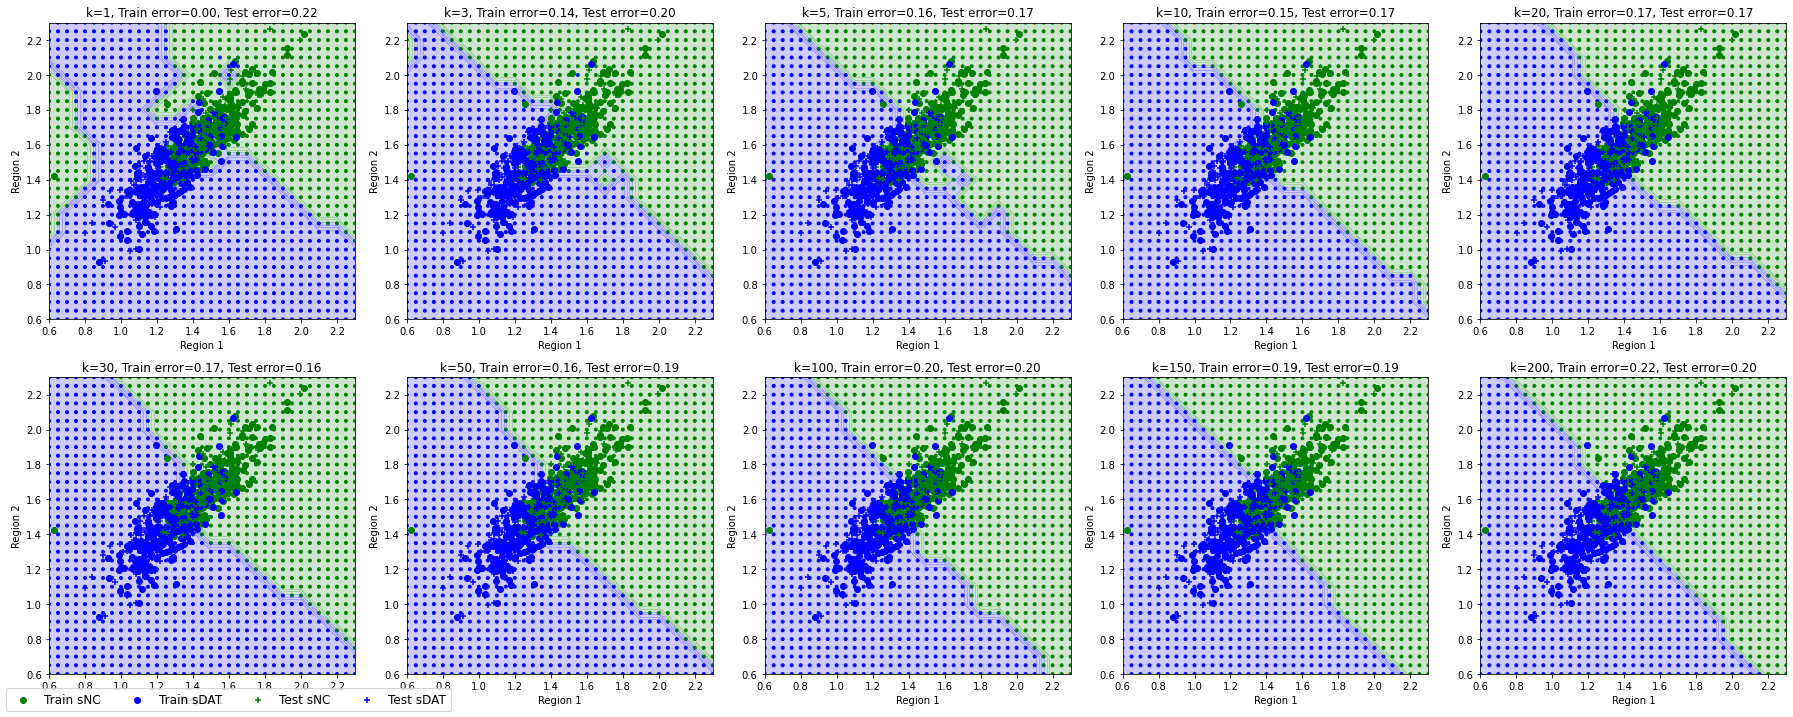

In [35]:
# Globals
K_vals = [1,3,5,10,20,30,50,100,150,200]
colors = ListedColormap(['green', 'blue'])

# Create a subplot grid for each K value
fig1, axes1 = plt.subplots(nrows=2, ncols=5, figsize=(25,10))
p_loc = [[0,0], [0,1], [0,2], [0,3], [0,4], [1,0], [1,1], [1,2], [1,3], [1,4]]

for i, k in enumerate(K_vals):
  # Predict and Plot the Labels for grid points using Optimum model
  grid_predictions = KNN[i].predict(grid_df)
  #print("loc Select:", i, p_loc[i])
  axes1[p_loc[i][0], p_loc[i][1]].scatter(grid_df.iloc[:, 0], grid_df.iloc[:, 1], c=grid_predictions, marker='.', cmap=colors)

  #==============================================================================
  # Draw Contour through class boundary
  x_min, x_max = grid_df.iloc[:, 0].min(), grid_df.iloc[:, 0].max()+0.1
  y_min, y_max = grid_df.iloc[:, 1].min(), grid_df.iloc[:, 1].max()+0.1
  # Create the Meshgrid to Crete the Contour Grid
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
  Cont_Z = KNN[i].predict(np.c_[xx.ravel(), yy.ravel()])
  Cont_Z = Cont_Z.reshape(xx.shape)
  # Plot the Contour
  #plt.contourf(xx, yy, Cont_Z, alpha= 0.3, cmap=plt.cm.GnBu)
  axes1[p_loc[i][0], p_loc[i][1]].contourf(xx, yy, Cont_Z, alpha= 0.2, cmap=colors)

  #==============================================================================
  # Plot Train Data Classification
  axes1[p_loc[i][0], p_loc[i][1]].scatter(train_sNC.iloc[:, 0], train_sNC.iloc[:, 1], c='g', marker='o', label='Train sNC')
  axes1[p_loc[i][0], p_loc[i][1]].scatter(train_sDAT.iloc[:, 0], train_sDAT.iloc[:, 1], c='b', marker='o', label='Train sDAT')

  #==============================================================================
  # Plot Test Data Classification
  axes1[p_loc[i][0], p_loc[i][1]].scatter(test_sNC.iloc[:, 0], test_sNC.iloc[:, 1], c='g', marker='+', label='Test sNC')
  axes1[p_loc[i][0], p_loc[i][1]].scatter(test_sDAT.iloc[:, 0], test_sDAT.iloc[:, 1], c='b', marker='+', label='Test sDAT')

  #==============================================================================
  # Set Title and Legends
  axes1[p_loc[i][0], p_loc[i][1]].set_title("k={}, Train error={:.2f}, Test error={:.2f}".format(k, results[i]["train_error"], results[i]["test_error"]))
  #axes1[p_loc[i][0], p_loc[i][1]].legend(loc='upper left')
  axes1[p_loc[i][0], p_loc[i][1]].set_xlabel('Region 1')
  axes1[p_loc[i][0], p_loc[i][1]].set_ylabel('Region 2')

#==============================================================================
#Show the plot
#fig1.legend(labels=labels, loc="lower center", ncol=4)
handles, labels = axes1[0,0].get_legend_handles_labels()
fig1.legend(handles, labels, loc='lower left', ncol=4, fontsize='large', fancybox=True)

fig1.tight_layout()
plt.show()


### Analyzis of the KNN classifier for the K Values: ToDo



# Question 2

---

Select the classifier with the lowest test error rate from the experiment in Question 1. Using the “k” value from
this classifier but changing the distance metric to Manhattan distance, train a new classifier. Again, generate the
visualization plot for the classification boundary with the training and test dataset samples overlaid and colored based
on their true labels. In the plot title report the training and test error rates. Discuss the performance of this classifier in
comparison to the classifier with the lowest test error rate from Question 1.

Optimum Model from Q1: KNeighborsClassifier(metric='euclidean', n_neighbors=30)
Optimum K Value:30 of Test Error Rate=0.16000
-------------------------

New Classifier using manhattan distance: KNeighborsClassifier(metric='manhattan', n_neighbors=30)
k=30, Test Error Rate=0.16456
-------------------------



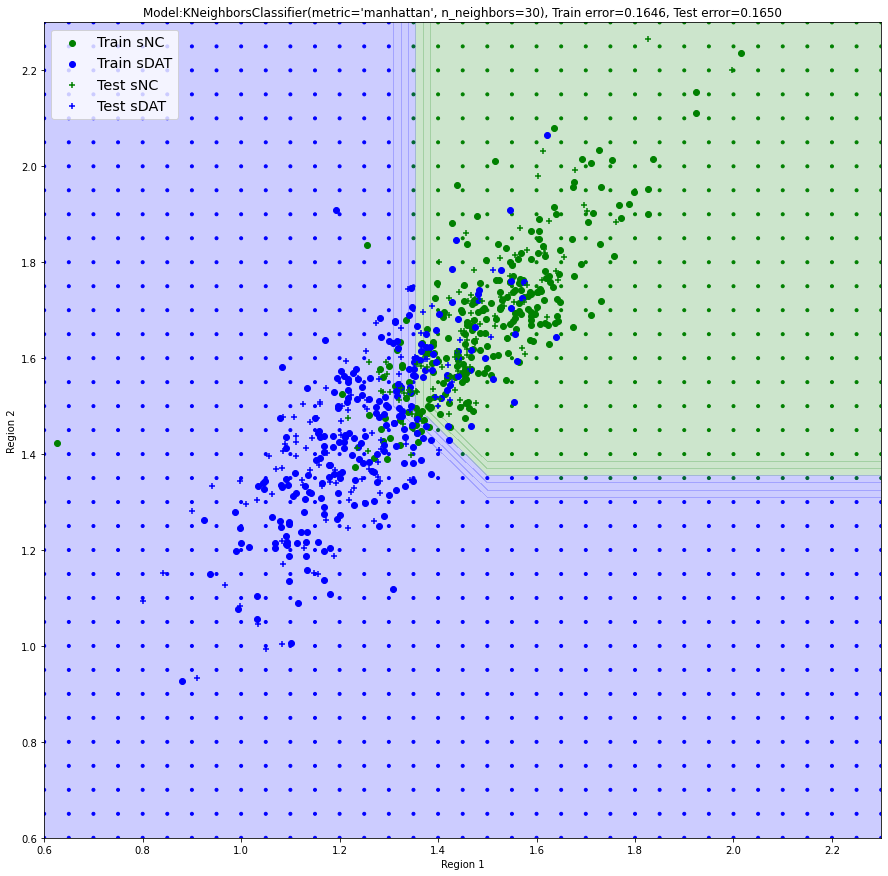

In [36]:
# Print the Optinum Model and the Performance it produced
print("Optimum Model from Q1:", OPT_Mod)
print("Optimum K Value:{} of Test Error Rate={:.5f}".format(results[opt_i]["K"], results[opt_i]["test_error"]))

OPT_K = results[opt_i]["K"]

knn2 = KNeighborsClassifier(n_neighbors=OPT_K, metric='manhattan')
knn2.fit(train_data, train_labels)
train_accuracy2 = knn2.score(train_data, train_labels)
test_accuracy2 = knn2.score(test_data, test_labels)

train_error2 = 1 - train_accuracy2
test_error2 = 1 - test_accuracy2
print("-------------------------\r\n")
print("New Classifier using manhattan distance:",knn2)
print("k={}, Test Error Rate={:.5f}".format(OPT_K, train_error2, test_error2))
print("-------------------------\r\n")

grid_df = pd.read_csv("2D_grid_points.csv")
colors = ListedColormap(['green', 'blue'])

# Predict and Plot the Labels for grid points using Optimum model
grid_predictions2 = knn2.predict(grid_df)

plt.figure(figsize=(15,15))

plt.scatter(grid_df.iloc[:, 0], grid_df.iloc[:, 1], c=grid_predictions2, marker='.', cmap=colors)

# Draw Contour through class boundary
x_min, x_max = grid_df.iloc[:, 0].min(), grid_df.iloc[:, 0].max()+0.1
y_min, y_max = grid_df.iloc[:, 1].min(), grid_df.iloc[:, 1].max()+0.1

# Create the Meshgrid to Crete the Contour Grid
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Cont_Z = knn2.predict(np.c_[xx.ravel(), yy.ravel()])
Cont_Z = Cont_Z.reshape(xx.shape)

# Plot the Contour
plt.contourf(xx, yy, Cont_Z, alpha= 0.2, cmap=colors)

# Plot Train Data Classification
plt.scatter(train_sNC.iloc[:, 0], train_sNC.iloc[:, 1], c='g', marker='o', label='Train sNC')
plt.scatter(train_sDAT.iloc[:, 0], train_sDAT.iloc[:, 1], c='b', marker='o', label='Train sDAT')

# Plot Test Data Classification
plt.scatter(test_sNC.iloc[:, 0], test_sNC.iloc[:, 1], c='g', marker='+', label='Test sNC')
plt.scatter(test_sDAT.iloc[:, 0], test_sDAT.iloc[:, 1], c='b', marker='+', label='Test sDAT')

# Set Title and Legends
plt.title("Model:{}, Train error={:.4f}, Test error={:.4f}".format(knn2, train_error2, test_error2))
plt.legend(loc='upper left', fontsize='x-large', fancybox=True)
plt.xlabel('Region 1')
plt.ylabel('Region 2')

#Show the plot
plt.show()
